In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
df = pd.read_csv('/content/drive/My Drive/USCrime/crime_rates.csv')

In [30]:
df.head()

,State,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape,Robbery,Aggravated assault,Property crime,Burglary,Larceny-theft,Motor vehicle theft,Arson
0,Alabama,Hoover,"85,670",114,4.0,15,27,68,"1,922",128,"1,694",100,2
1,Alaska,Anchorage,"287,731","3,581",32.0,540,621,"2,388","12,261","1,692","9,038","1,531",93
2,Alaska,Bethel,"6,544",130,1.0,47,3,79,132,20,84,28,12
3,Alaska,Bristol Bay Borough,852,2,0.0,0,0,2,20,5,8,7,0
4,Alaska,Cordova,"2,150",0,0.0,0,0,0,7,1,6,0,0


In [31]:
df.shape

(8093, 13)

In [ ]:
len(list(set(df['City'])))

6290

In [ ]:
df['City'].drop_duplicates(inplace=True)

In [ ]:
df.shape

(8093, 13)

In [ ]:
for item in df['City']:
  if any(map(str.isdigit, item)):
    # item = item.replace(item,item[:-1])
    print(item)

In [ ]:
df.dtypes

State                                    object
City                                     object
Population                               object
Violent crime                            object
Murder and nonnegligent manslaughter    float64
Rape                                     object
Robbery                                  object
Aggravated assault                       object
Property crime                           object
Burglary                                 object
Larceny-theft                            object
Motor vehicle theft                      object
Arson                                    object
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8095 entries, 0 to 8094
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   State                                 8095 non-null   object 
 1   City                                  8095 non-null   object 
 2   Population                            8094 non-null   object 
 3   Violent crime                         8074 non-null   object 
 4   Murder and nonnegligent manslaughter  8092 non-null   float64
 5   Rape                                  8080 non-null   object 
 6   Robbery                               8094 non-null   object 
 7   Aggravated assault                    8093 non-null   object 
 8   Property crime                        8072 non-null   object 
 9   Burglary                              8082 non-null   object 
 10  Larceny-theft                         8088 non-null   object 
 11  Motor vehicle the

In [32]:
df['Population'] = df['Population'].str.replace(',','')
df['Population'] = pd.to_numeric(df['Population'])
df['Violent crime'] = df['Violent crime'].str.replace(',','')
df['Violent crime'] = pd.to_numeric(df['Violent crime'])
df['Rape'] = df['Rape'].str.replace(',','')
df['Rape'] = pd.to_numeric(df['Rape'])
df['Robbery'] = df['Robbery'].str.replace(',','')
df['Robbery'] = pd.to_numeric(df['Robbery'])
df['Aggravated assault'] = df['Aggravated assault'].str.replace(',','')
df['Aggravated assault'] = pd.to_numeric(df['Aggravated assault'])
df['Property crime'] = df['Property crime'].str.replace(',','')
df['Property crime'] = pd.to_numeric(df['Property crime'])
df['Burglary'] = df['Burglary'].str.replace(',','')
df['Burglary'] = pd.to_numeric(df['Burglary'])
df['Larceny-theft'] = df['Larceny-theft'].str.replace(',','')
df['Larceny-theft'] = pd.to_numeric(df['Larceny-theft'])
df['Motor vehicle theft'] = df['Motor vehicle theft'].str.replace(',','')
df['Motor vehicle theft'] = pd.to_numeric(df['Motor vehicle theft'])
df['Arson'] = df['Arson'].str.replace(',','')
df['Arson'] = pd.to_numeric(df['Arson'])

In [33]:
df.dtypes

State                                    object
City                                     object
Population                                int64
Violent crime                           float64
Murder and nonnegligent manslaughter    float64
Rape                                    float64
Robbery                                 float64
Aggravated assault                      float64
Property crime                          float64
Burglary                                float64
Larceny-theft                           float64
Motor vehicle theft                     float64
Arson                                   float64
dtype: object

In [34]:
df.fillna(0, inplace=True)

In [35]:
df.isnull().sum()

State                                   0
City                                    0
Population                              0
Violent crime                           0
Murder and nonnegligent manslaughter    0
Rape                                    0
Robbery                                 0
Aggravated assault                      0
Property crime                          0
Burglary                                0
Larceny-theft                           0
Motor vehicle theft                     0
Arson                                   0
dtype: int64

In [36]:
df['Total_Crime'] = df['Violent crime'] + df['Property crime'] + df['Arson']

In [37]:
df['Violent_Crime_rate'] = df['Violent crime'] / df['Population']
df['Property_Crime_rate'] = df['Property crime'] / df['Population']
df['Crime_rate'] = df['Total_Crime'] / df['Population']

In [38]:
df['Crime_rate'].dtype

dtype('float64')

In [39]:
df.head()

,State,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape,Robbery,Aggravated assault,Property crime,Burglary,Larceny-theft,Motor vehicle theft,Arson,Total_Crime,Violent_Crime_rate,Property_Crime_rate,Crime_rate
0,Alabama,Hoover,85670,114.0,4.0,15.0,27.0,68.0,1922.0,128.0,1694.0,100.0,2.0,2038.0,0.001331,0.022435,0.023789
1,Alaska,Anchorage,287731,3581.0,32.0,540.0,621.0,2388.0,12261.0,1692.0,9038.0,1531.0,93.0,15935.0,0.012446,0.042613,0.055382
2,Alaska,Bethel,6544,130.0,1.0,47.0,3.0,79.0,132.0,20.0,84.0,28.0,12.0,274.0,0.019866,0.020171,0.041870
3,Alaska,Bristol Bay Borough,852,2.0,0.0,0.0,0.0,2.0,20.0,5.0,8.0,7.0,0.0,22.0,0.002347,0.023474,0.025822
4,Alaska,Cordova,2150,0.0,0.0,0.0,0.0,0.0,7.0,1.0,6.0,0.0,0.0,7.0,0.000000,0.003256,0.003256


In [40]:
lst = []
for item in list(df['Crime_rate']):
  lst.append(item)
print(max(lst))

0.36449963476990505


In [41]:
features = ['Violent_Crime_rate','Property_Crime_rate','Crime_rate']

In [42]:
df_kmean = df[features]

In [43]:
df_kmean.head()

,Violent_Crime_rate,Property_Crime_rate,Crime_rate
0,0.001331,0.022435,0.023789
1,0.012446,0.042613,0.055382
2,0.019866,0.020171,0.041870
3,0.002347,0.023474,0.025822
4,0.000000,0.003256,0.003256


In [44]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
kmeans.fit(df_kmean)
y_kmeans = kmeans.predict(df_kmean)

In [ ]:
y_kmeans

array([9, 7, 5, ..., 5, 5, 5], dtype=int32)

In [45]:
df['Crime_Group'] = pd.Series(y_kmeans+1, index=df.index)

In [46]:
df['Crime_Group'].value_counts()

5    3692
1    2738
3    1269
2     370
4      24
Name: Crime_Group, dtype: int64

In [55]:
df.loc[df['Crime_Group']==4]

,State,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape,Robbery,Aggravated assault,Property crime,Burglary,Larceny-theft,Motor vehicle theft,Arson,Total_Crime,Violent_Crime_rate,Property_Crime_rate,Crime_rate,Crime_Group
354,California,Colma,1512,28.0,0.0,0.0,20.0,8.0,325.0,36.0,263.0,26.0,2.0,355.0,0.018519,0.214947,0.234788,4
397,California,Emeryville,12380,166.0,0.0,12.0,114.0,40.0,2623.0,95.0,2415.0,113.0,3.0,2792.0,0.013409,0.211874,0.225525,4
460,California,Irwindale,1469,26.0,0.0,1.0,8.0,17.0,240.0,73.0,139.0,28.0,3.0,269.0,0.017699,0.163376,0.183118,4
620,California,Sand City,407,9.0,0.0,0.0,2.0,7.0,77.0,4.0,70.0,3.0,0.0,86.0,0.022113,0.189189,0.211302,4
775,Colorado,Glendale,5289,50.0,1.0,5.0,14.0,30.0,936.0,22.0,833.0,81.0,1.0,987.0,0.009454,0.176971,0.186614,4
1123,Florida,Medley,896,11.0,0.0,0.0,3.0,8.0,179.0,28.0,130.0,21.0,0.0,190.0,0.012277,0.199777,0.212054,4
1621,Illinois,Hodgkins,1883,7.0,0.0,1.0,0.0,6.0,257.0,2.0,253.0,2.0,1.0,265.0,0.003717,0.136484,0.140733,4
1825,Illinois,Rosemont,4094,36.0,0.0,16.0,6.0,14.0,504.0,11.0,488.0,5.0,0.0,540.0,0.008793,0.123107,0.131900,4
3219,Michigan,Mackinac Island,468,2.0,0.0,0.0,0.0,2.0,94.0,0.0,93.0,1.0,0.0,96.0,0.004274,0.200855,0.205128,4
3728,Missouri,Branson West,449,3.0,0.0,1.0,0.0,2.0,102.0,1.0,101.0,0.0,0.0,105.0,0.006682,0.227171,0.233853,4


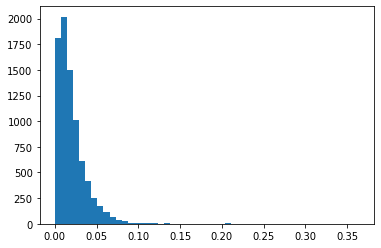

In [47]:
x = df['Crime_rate']
plt.hist(x, bins = 50)
plt.show()

In [24]:
df['Crime_rate'] = pd.Series(["{0:.2f}%".format(val * 100) for val in df['Crime_rate']], index = df.index)

In [48]:
df.sample(30)

,State,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape,Robbery,Aggravated assault,Property crime,Burglary,Larceny-theft,Motor vehicle theft,Arson,Total_Crime,Violent_Crime_rate,Property_Crime_rate,Crime_rate,Crime_Group
2091,Kansas,Alta Vista,419,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,5
524,California,Modesto,216542,1758.0,13.0,94.0,399.0,1252.0,7183.0,1149.0,4849.0,1185.0,95.0,9036.0,0.008119,0.033171,0.041729,3
5431,Ohio,Georgetown,4253,6.0,0.0,3.0,0.0,3.0,85.0,16.0,67.0,2.0,0.0,91.0,0.001411,0.019986,0.021397,1
7003,Texas,Irving,245423,617.0,5.0,56.0,294.0,262.0,5982.0,719.0,4552.0,711.0,16.0,6615.0,0.002514,0.024374,0.026953,1
876,Connecticut,Hamden,60855,199.0,2.0,9.0,45.0,143.0,1328.0,109.0,1047.0,172.0,1.0,1528.0,0.003270,0.021822,0.025109,1
2290,Kentucky,Fort Wright,5744,4.0,0.0,1.0,2.0,1.0,72.0,7.0,58.0,7.0,0.0,76.0,0.000696,0.012535,0.013231,5
5292,North Dakota,Dickinson,23428,52.0,0.0,3.0,2.0,47.0,446.0,43.0,370.0,33.0,2.0,500.0,0.002220,0.019037,0.021342,1
4730,New Mexico,Magdalena,873,3.0,1.0,0.0,0.0,2.0,13.0,3.0,9.0,1.0,0.0,16.0,0.003436,0.014891,0.018328,1
7136,Texas,Pasadena,153689,839.0,8.0,82.0,182.0,567.0,3861.0,530.0,2789.0,542.0,7.0,4707.0,0.005459,0.025122,0.030627,1
4042,Nebraska,Lovelock,1806,6.0,0.0,1.0,0.0,5.0,39.0,12.0,24.0,3.0,0.0,45.0,0.003322,0.021595,0.024917,1


In [28]:
df.loc[df['Crime_Group'] == 9]

,State,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape,Robbery,Aggravated assault,Property crime,Burglary,Larceny-theft,Motor vehicle theft,Arson,Total_Crime,Crime_rate,Crime_Group
7,Alaska,Fairbanks,31493,247.0,3.0,33.0,52.0,159.0,1353.0,163.0,1006.0,184.0,23.0,3223.0,10.23%,9
10,Alaska,Juneau,31810,289.0,3.0,24.0,45.0,217.0,1292.0,187.0,1012.0,93.0,16.0,3178.0,9.99%,9
28,Arizona,Apache Junction,42531,95.0,2.0,12.0,14.0,67.0,0.0,0.0,453.0,88.0,6.0,737.0,1.73%,9
31,Arizona,Bullhead City,40532,129.0,2.0,23.0,25.0,79.0,1352.0,235.0,981.0,136.0,9.0,2971.0,7.33%,9
33,Arizona,Casa Grande,58366,274.0,2.0,27.0,33.0,212.0,1336.0,149.0,1071.0,116.0,11.0,3231.0,5.54%,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8063,Wyoming,Casper,57752,169.0,2.0,58.0,18.0,91.0,1677.0,285.0,1271.0,121.0,2.0,3694.0,6.40%,9
8064,Wyoming,Cheyenne,64501,220.0,5.0,43.0,27.0,145.0,1999.0,211.0,1613.0,175.0,11.0,4449.0,6.90%,9
8070,Wyoming,Gillette,31960,43.0,1.0,9.0,0.0,33.0,626.0,62.0,529.0,35.0,2.0,1340.0,4.19%,9
8077,Wyoming,Laramie,32669,58.0,0.0,17.0,2.0,39.0,318.0,50.0,252.0,16.0,6.0,758.0,2.32%,9


In [56]:
df['Crime_Rank'] = df['Crime_Group'].map({5:'Fairly Low', 4: 'High', 3: 'Medium', 2: 'Fairly High', 1:'Low'})

In [57]:
df.head()

,State,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape,Robbery,Aggravated assault,Property crime,Burglary,Larceny-theft,Motor vehicle theft,Arson,Total_Crime,Violent_Crime_rate,Property_Crime_rate,Crime_rate,Crime_Group,Crime_Rank
0,Alabama,Hoover,85670,114.0,4.0,15.0,27.0,68.0,1922.0,128.0,1694.0,100.0,2.0,2038.0,0.001331,0.022435,0.023789,1,Low
1,Alaska,Anchorage,287731,3581.0,32.0,540.0,621.0,2388.0,12261.0,1692.0,9038.0,1531.0,93.0,15935.0,0.012446,0.042613,0.055382,3,Medium
2,Alaska,Bethel,6544,130.0,1.0,47.0,3.0,79.0,132.0,20.0,84.0,28.0,12.0,274.0,0.019866,0.020171,0.041870,3,Medium
3,Alaska,Bristol Bay Borough,852,2.0,0.0,0.0,0.0,2.0,20.0,5.0,8.0,7.0,0.0,22.0,0.002347,0.023474,0.025822,1,Low
4,Alaska,Cordova,2150,0.0,0.0,0.0,0.0,0.0,7.0,1.0,6.0,0.0,0.0,7.0,0.000000,0.003256,0.003256,5,Fairly Low


In [58]:
df['Violent_Crime_rate'] = pd.Series(["{0:.2f}%".format(val * 100) for val in df['Violent_Crime_rate']], index = df.index)
df['Property_Crime_rate'] = pd.Series(["{0:.2f}%".format(val * 100) for val in df['Property_Crime_rate']], index = df.index)
df['Crime_rate'] = pd.Series(["{0:.2f}%".format(val * 100) for val in df['Crime_rate']], index = df.index)

In [59]:
df.head()

,State,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape,Robbery,Aggravated assault,Property crime,Burglary,Larceny-theft,Motor vehicle theft,Arson,Total_Crime,Violent_Crime_rate,Property_Crime_rate,Crime_rate,Crime_Group,Crime_Rank
0,Alabama,Hoover,85670,114.0,4.0,15.0,27.0,68.0,1922.0,128.0,1694.0,100.0,2.0,2038.0,0.13%,2.24%,2.38%,1,Low
1,Alaska,Anchorage,287731,3581.0,32.0,540.0,621.0,2388.0,12261.0,1692.0,9038.0,1531.0,93.0,15935.0,1.24%,4.26%,5.54%,3,Medium
2,Alaska,Bethel,6544,130.0,1.0,47.0,3.0,79.0,132.0,20.0,84.0,28.0,12.0,274.0,1.99%,2.02%,4.19%,3,Medium
3,Alaska,Bristol Bay Borough,852,2.0,0.0,0.0,0.0,2.0,20.0,5.0,8.0,7.0,0.0,22.0,0.23%,2.35%,2.58%,1,Low
4,Alaska,Cordova,2150,0.0,0.0,0.0,0.0,0.0,7.0,1.0,6.0,0.0,0.0,7.0,0.00%,0.33%,0.33%,5,Fairly Low


In [60]:
df.to_csv('USCrimeData_Cleaned.csv')